# Begin Ray Process

In [1]:
from clases.red_rddas_model import RedRddasModel
import ray
ray.init(num_cpus=4)
# import random  # generate random numbers
# from random import randint  # generate random numbers integers
# from itertools import product  # generate combinations of numbers

{'node_ip_address': '192.168.42.93',
 'raylet_ip_address': '192.168.42.93',
 'redis_address': '192.168.42.93:6379',
 'object_store_address': '/tmp/ray/session_2022-04-19_09-48-13_385641_5274/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2022-04-19_09-48-13_385641_5274/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2022-04-19_09-48-13_385641_5274',
 'metrics_export_port': 59840,
 'gcs_address': '192.168.42.93:41761',
 'node_id': '37880889694fde77feb2771ffb8d44e6f7e7eaf97fd41ad1c1ef810c'}

# Read the serial object of the RDDA

In [2]:
# path = "files/example_research/rdda_3_5_2_2_2.pickle"
# path = "files/24_02_2022_3_5_2_2_2.pickle"
# path = "files/03_03_2022_5_5_2_2_2.pickle"
# path = "files/08_03_2022_3_5_2_2_2.pickle"
# path = "files/14_03_2022_4_5_2_2_2.pickle"
# path = "files/15_03_2022_3_5_2_2_2.pickle"
# path = "files/26_03_2022_3_5_2_2_2.pickle"
# path = "files/06_04_2022_3_5_2_2_2.pickle"
path = "files/06_04_2022_4_5_2_2_2.pickle"
path_base = path[:-7]

print("Reading the file: ", path)
oRedRddasModel = RedRddasModel.load_file_pickle(path)

Reading the file:  files/06_04_2022_4_5_2_2_2.pickle


# Show the RDDA information

In [3]:
#Show the RDDA Information
oRedRddasModel.show()

NETWORK RDDA DESCRIPTION
Number of RDDs : 4
Number of variables by RDD : 5
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 4
Maximum number of clauses by function : 4
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2, 3, 4, 5]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 2
Variables : [10, 8]
Name Variable : 21
Coupling Function : 10 ∨ 8
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 4
Variables : [16, 17]
Name Variable : 22
Coupling Function : 16 ∨ 17
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[2, 4]]
V: 2 CNF :[[3, 1, 4]]
V: 3 CNF :[[1], [4, 5, 2]]
V: 4 CNF :[[22]]
V: 5 CNF :[[21, 3, 22], [2, 3]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[6, 7, 8, 9, 10]
List of coupling signals : 
---------------
Network Input : 2
Network Output : 3
Va

# Show the Topology Graph of RDDA

Topology Graph of the RDDA using igraph Library
Show the Topology Graph of the RDDA


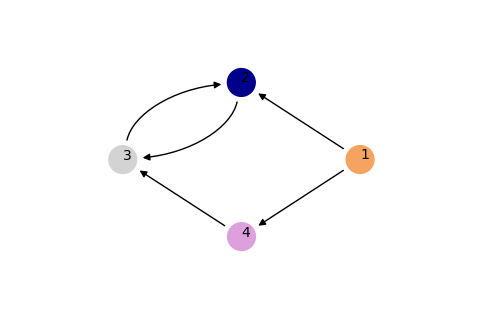

In [4]:
# generate the diagram of the Network RDDA, show and save graph in .eps format
# Show the topology of the RDDA in a graph using the igraph library and save the graph in eps format
print("Topology Graph of the RDDA using igraph Library")
oRedRddasModel.graph_topology_igraph(show_graph=True,save_graph=True,path_graph="")

# Calculate the compatible pairs

In [5]:
# Calculate the Attractors by RDDA and by Signal
result = RedRddasModel.calculation_compatible_pairs.remote(oRedRddasModel)
oRedRddasModel = ray.get(result)

# Assembly the Attractors Field

In [6]:
import time
inicio = time.time()

# Calculate the Attractors by RDDA and by Signal with iterative Method
result = RedRddasModel.assembly_attractor_fields_iterative.remote(oRedRddasModel)
oRedRddasModel = ray.get(result)

fim = time.time()
print("Duracion 1:",fim - inicio)

(calculation_compatible_pairs pid=5395) ATTRACTORS GROUP BY RDDA AND PERMUTATION
(calculation_compatible_pairs pid=5395) RDDA: 1  - Signal: 00
(calculation_compatible_pairs pid=5395) A_1_1: [['1', '1', '1', '0', '1', '0', '0']]
(calculation_compatible_pairs pid=5395) A_1_2: [['0', '0', '0', '0', '0', '0', '0']]
(calculation_compatible_pairs pid=5395) A_1_3: [['0', '1', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '0', '0', '0']]
(calculation_compatible_pairs pid=5395) RDDA: 1  - Signal: 01
(calculation_compatible_pairs pid=5395) A_1_1: [['1', '1', '1', '1', '1', '0', '1']]
(calculation_compatible_pairs pid=5395) RDDA: 1  - Signal: 10
(calculation_compatible_pairs pid=5395) A_1_1: [['1', '1', '1', '0', '1', '1', '0']]
(calculation_compatible_pairs pid=5395) A_1_2: [['0', '0', '0', '0', '0', '1', '0']]
(calculation_compatible_pairs pid=5395) RDDA: 1  - Signal: 11
(calculation_compatible_pairs pid=5395) A_1_1: [['1', '1', '1', '1', '1', '1', '1']]
(calculation_compatible_pairs pid=5395)

# Assembly the Attractor Fields Optimized

In [7]:
import time
inicio = time.time()

# Calculate the Attractors by RDDA and by Signal with iterative Method
oRedRddasModel = RedRddasModel.assembly_attractor_fields_optimized(oRedRddasModel)

fim = time.time()
print("Duracion 1:",fim - inicio)

OUPUT 12
[[0, 7], [0, 18], [7, 11], [11, 7], [18, 11]]
[[1, 7], [1, 18], [7, 11], [11, 7], [18, 11]]
[[2, 7], [2, 18], [7, 11], [11, 7], [18, 11]]
[[3, 7], [3, 16], [7, 11], [11, 7], [16, 11]]
[[3, 7], [3, 17], [7, 11], [11, 7], [17, 11]]
[[3, 7], [3, 19], [7, 11], [11, 7], [19, 11]]
[[6, 9], [6, 20], [9, 13], [13, 9], [20, 13]]
[[6, 9], [6, 20], [9, 14], [14, 9], [20, 14]]
[[6, 9], [6, 20], [9, 15], [15, 9], [20, 15]]
[[6, 9], [6, 21], [9, 13], [13, 9], [21, 13]]
[[6, 9], [6, 21], [9, 14], [14, 9], [21, 14]]
[[6, 9], [6, 21], [9, 15], [15, 9], [21, 15]]
[[[0, 7], [0, 18], [7, 11], [11, 7], [18, 11]], [[1, 7], [1, 18], [7, 11], [11, 7], [18, 11]], [[2, 7], [2, 18], [7, 11], [11, 7], [18, 11]], [[3, 7], [3, 16], [7, 11], [11, 7], [16, 11]], [[3, 7], [3, 17], [7, 11], [11, 7], [17, 11]], [[3, 7], [3, 19], [7, 11], [11, 7], [19, 11]], [[6, 9], [6, 20], [9, 13], [13, 9], [20, 13]], [[6, 9], [6, 20], [9, 14], [14, 9], [20, 14]], [[6, 9], [6, 20], [9, 15], [15, 9], [20, 15]], [[6, 9], [6, 21

In [8]:
# Show the topology graph using the Networkx library
# oRedRddasModel.graph_topology_networkx(show_graph = True ,save_graph=False,path_graph="")

# Graph the relations between compatible attractor pairs

(assembly_attractor_fields_iterative pid=5395) ([6, 9], [6, 20], [9, 13], [13, 9], [20, 13])
(assembly_attractor_fields_iterative pid=5395) ([6, 9], [6, 20], [9, 14], [14, 9], [20, 14])
(assembly_attractor_fields_iterative pid=5395) ([6, 9], [6, 20], [9, 15], [15, 9], [20, 15])
(assembly_attractor_fields_iterative pid=5395) ([6, 9], [6, 21], [9, 13], [13, 9], [21, 13])
(assembly_attractor_fields_iterative pid=5395) ([6, 9], [6, 21], [9, 14], [14, 9], [21, 14])
(assembly_attractor_fields_iterative pid=5395) ([6, 9], [6, 21], [9, 15], [15, 9], [21, 15])
(assembly_attractor_fields_iterative pid=5395) Number of valid Attractor Fields: 12
(assembly_attractor_fields_iterative pid=5395) END CALCULATE ATTRACTORS FIELDS
(assembly_attractor_fields_iterative pid=5395) ######################################################


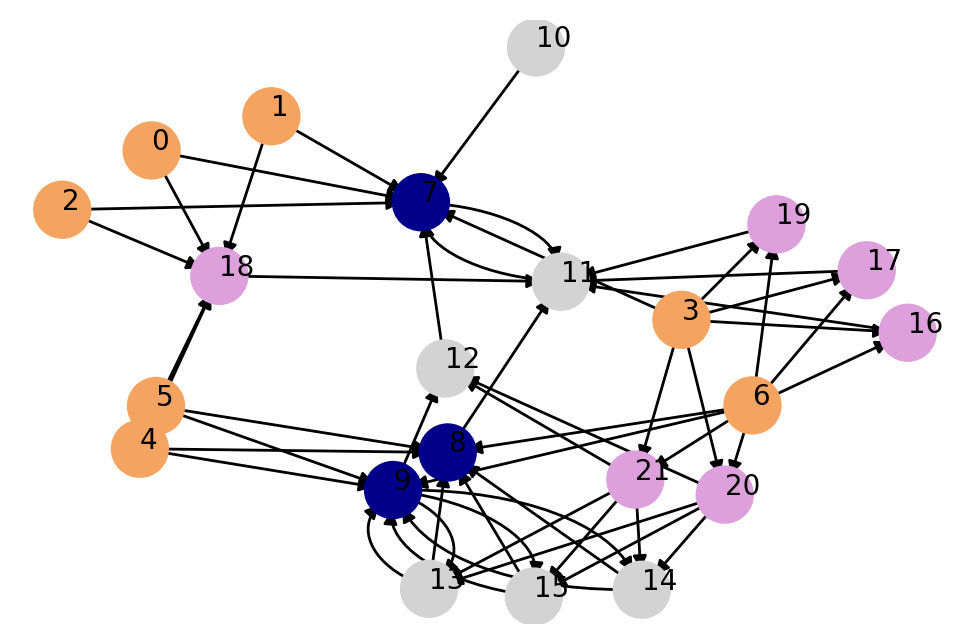

In [9]:
# Show the Graph of the attractor pairs
oRedRddasModel.graph_attractor_pairs(export_graph=True, path=path_base)

# Graph the Attractor Fields

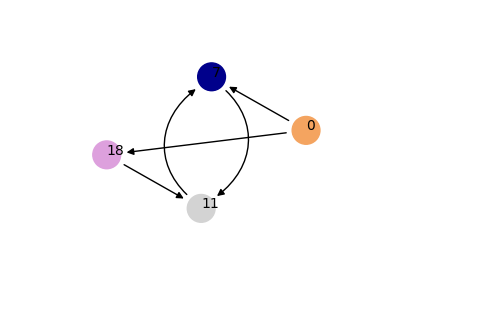

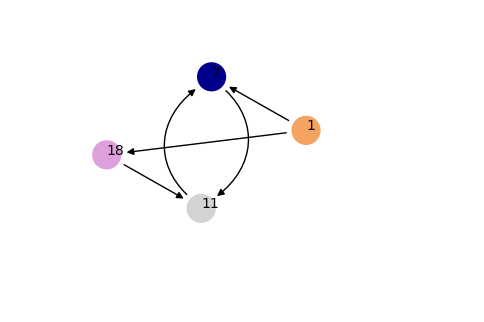

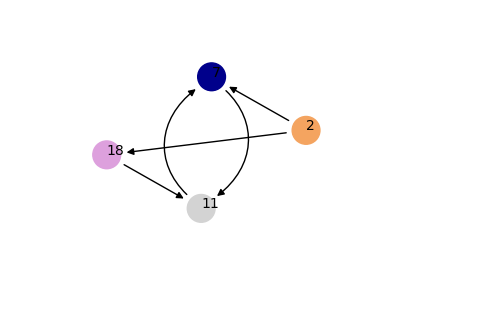

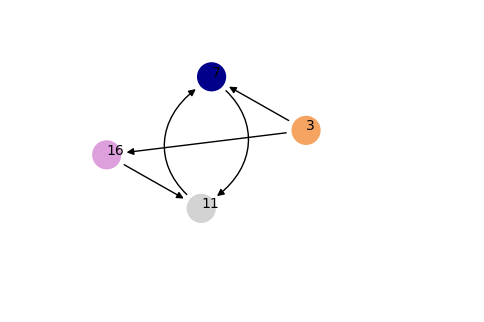

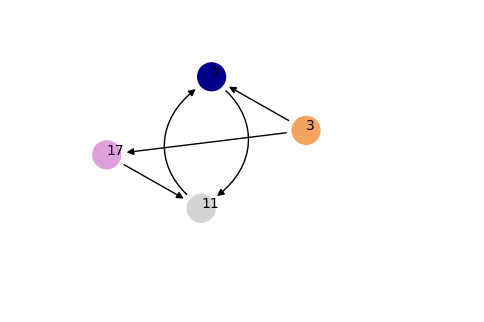

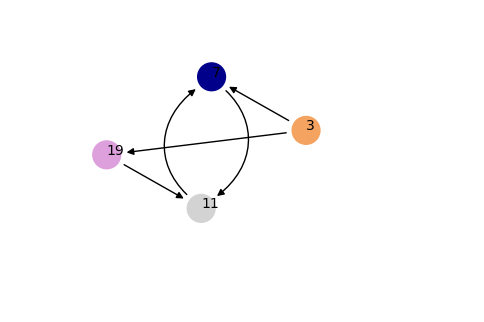

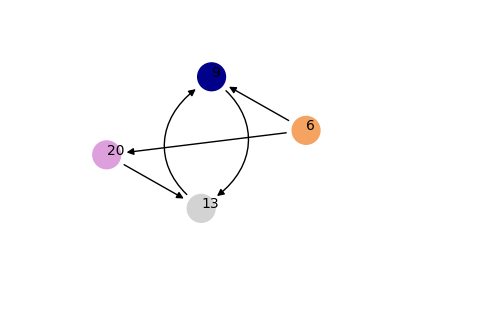

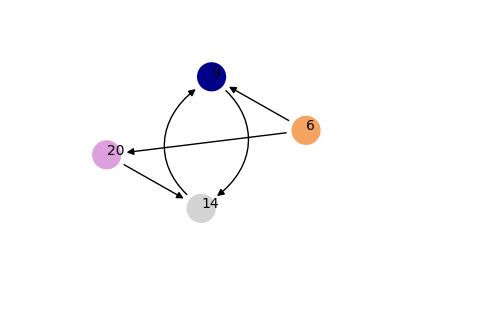

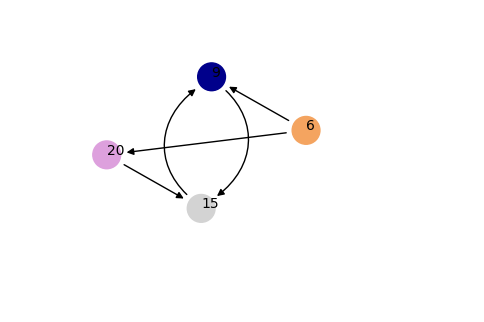

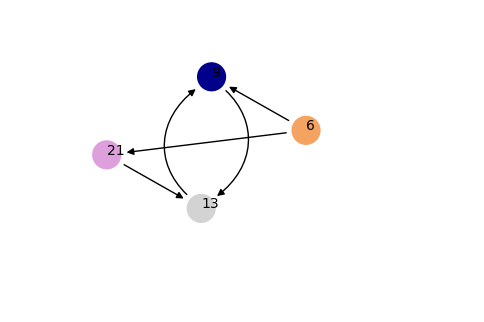

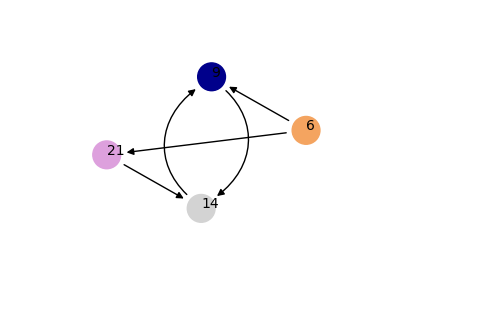

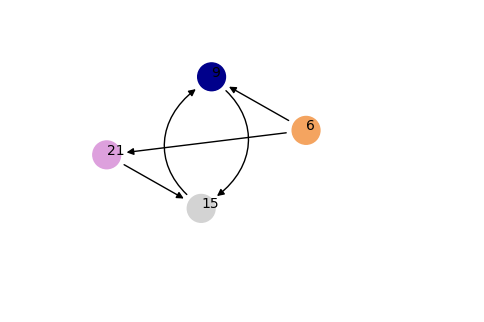

In [10]:
# Show the Graphs of the attractor fields
oRedRddasModel.graph_attractor_fields()

# Show the detail of each Attractor Field

In [11]:
# Show the detail for each attractor field
oRedRddasModel.show_detail_attractor_fields()

Attractor Field 1
Index: 0 - RDD: 1 - Attractor: [['1', '1', '1', '0', '1', '0', '0']]
Index: 7 - RDD: 2 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 18 - RDD: 4 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 11 - RDD: 3 - Attractor: [['0', '0', '0', '0', '0', '0']]
Attractor Field 2
Index: 1 - RDD: 1 - Attractor: [['0', '0', '0', '0', '0', '0', '0']]
Index: 7 - RDD: 2 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 18 - RDD: 4 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 11 - RDD: 3 - Attractor: [['0', '0', '0', '0', '0', '0']]
Attractor Field 3
Index: 2 - RDD: 1 - Attractor: [['0', '1', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '0', '0', '0']]
Index: 7 - RDD: 2 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 18 - RDD: 4 - Attractor: [['0', '0', '0', '0', '0', '0']]
Index: 11 - RDD: 3 - Attractor: [['0', '0', '0', '0', '0', '0']]
Attractor Field 4
Index: 3 - RDD: 1 - Attractor: [['1', '1', '1', '1', '1', '0', '1']]
Index: 7 - RDD: 2 - Attractor: [[

# Examples

In [12]:
# # Relations Between RDDs
# l_relations_rdds = []
# oRedRddasModel.list_of_rddas
# for o_rdd in oRedRddasModel.list_of_rddas:
#     for o_signal in o_rdd.list_of_signals:
#         l_relations_rdds.append([o_signal.rdda_entrada, o_signal.rdda_salida])
# print(l_relations_rdds)

# # List of attractors and his RDD
# l_attractor_rdd = []
# for v_key, v_value in oRedRddasModel.d_global_rdda_attractor.items():
#     l_attractor_rdd.append([v_key,v_value[0]])
# l_attractor_rdd

# #Diferent List of attractors pairs
# oRedRddasModel.group_signals_pairs
# oRedRddasModel.rddas_attractors
# oRedRddasModel.list_signal_pairs

# End Ray Process

In [13]:
# Explicit stop Ray
ray.shutdown()